# Coursework: Climate data analysis

In [511]:
# python packages needed. You can, of course, use others if you need them.

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy
from sklearn.metrics import mean_squared_error, mean_absolute_error

## TASK I - Preliminary analysis

**a. Import the `weather-denmark-resampled.pkl` dataset  provided  in  the  folderand explore  the dataset by answering the following questions.**

In [507]:
################################### 
# i.How many cities are there in the dataset? 5
###################################

# Reading the data from the pickle file
file_path = './weather-denmark-resampled.pkl'
df_weather = pd.read_pickle(file_path)

# Show the table
display(df_weather.head())

# Extract the cities names
columns_names = df_weather.columns
cities = np.unique([name[0] for name in columns_names])

print(f"the dataset cities {cities}")


Aalborg                                     Aarhus  \
                         Temp     Pressure  WindSpeed     WindDir   Temp   
DateTime                                                                   
1980-03-01 10:00:00  4.333333  1007.533333  11.266667  286.666667    4.0   
1980-03-01 11:00:00  5.000000  1007.766667  10.200000  280.000000    5.0   
1980-03-01 12:00:00  5.000000  1008.000000  10.300000  290.000000    5.0   
1980-03-01 13:00:00  5.000000  1008.066667   9.700000  290.000000    5.0   
1980-03-01 14:00:00  4.333333  1008.133333  11.100000  283.333333    5.0   

                                                     Esbjerg           \
                        Pressure WindSpeed WindDir      Temp Pressure   
DateTime                                                                
1980-03-01 10:00:00  1008.000000      14.9   290.0       NaN      NaN   
1980-03-01 11:00:00  1008.300000      15.4   290.0  6.083333      NaN   
1980-03-01 12:00:00  1008.600000      13.4   280.0  6.583333      NaN   
1980-03-01 13:00:00  1008.433333      15.4   280.0  6.888889      NaN   
1980-03-01 14:00:00  1008.266667      14.9   300.0  6.222222      NaN   

                                              Odense                          \
                     WindSpeed     WindDir      Temp     Pressure  WindSpeed   
DateTime                                                                       
1980-03-01 10:00:00        NaN         NaN  5.545455  1010.933333  11.663636   
1980-03-01 11:00:00  12.383333  310.000000  6.142857  1011.066667  12.585714   
1980-03-01 12:00:00  12.883333  310.000000  7.000000  1011.200000  11.300000   
1980-03-01 13:00:00  13.244444  309.444444  7.000000  1011.300000  12.118182   
1980-03-01 14:00:00  12.911111  306.111111  6.857143  1011.400000  12.742857   

                                 Roskilde                                  
                        WindDir      Temp Pressure  WindSpeed     WindDir  
DateTime                                                                   
1980-03-01 10:00:00  285.454545       NaN      NaN        NaN         NaN  
1980-03-01 11:00:00  290.000000  5.000000      NaN  11.466667  280.000000  
1980-03-01 12:00:00  290.000000  5.000000      NaN  12.466667  280.000000  
1980-03-01 13:00:00  290.000000  5.166667      NaN  13.133333  278.333333  
1980-03-01 14:00:00  290.000000  5.833333      NaN  12.300000  270.000000

the dataset cities ['Aalborg' 'Aarhus' 'Esbjerg' 'Odense' 'Roskilde']


In [508]:
###############################
# ii.How many observations and features are there in this dataset?

###############################

number_observations = df_weather.shape[0]
features = list(df_weather['Aalborg'].columns)

print("number features are", len(features))
print("observations: ", number_observations)




number features are 4
observations:  333110


In [509]:
###############################
# iii.What are the names of the different features?

print("fetaures are", features)

###############################

fetaures are ['Temp', 'Pressure', 'WindSpeed', 'WindDir']


**b. Now that you got confident with the dataset, evaluate if the dataset contains anymissing values? If so, then remove them using the pandas built-in function.**



In [230]:
###########################
missing_report = df_weather.isna().mean() * 100
print(missing_report)

# Remove missing values
df_weather_cleaned = df_weather.dropna()
df_weather.isna().sum()

###########################

Aalborg   Temp         0.000000
          Pressure     0.000000
          WindSpeed    0.000000
          WindDir      0.000000
Aarhus    Temp         0.000000
          Pressure     0.000000
          WindSpeed    0.000000
          WindDir      0.000000
Esbjerg   Temp         0.000300
          Pressure     0.312209
          WindSpeed    0.000300
          WindDir      0.000300
Odense    Temp         0.000000
          Pressure     0.000000
          WindSpeed    0.000000
          WindDir      0.000000
Roskilde  Temp         0.000300
          Pressure     0.229354
          WindSpeed    0.000300
          WindDir      0.000300
dtype: float64


Aalborg   Temp            0
          Pressure        0
          WindSpeed       0
          WindDir         0
Aarhus    Temp            0
          Pressure        0
          WindSpeed       0
          WindDir         0
Esbjerg   Temp            1
          Pressure     1040
          WindSpeed       1
          WindDir         1
Odense    Temp            0
          Pressure        0
          WindSpeed       0
          WindDir         0
Roskilde  Temp            1
          Pressure      764
          WindSpeed       1
          WindDir         1
dtype: int64

**c. Extract the general statistical properties summarising the minimum, maximum, median, mean and standard deviation values for all the features in the dataset. Spot any anomalies in these properties and clearly explain why you classify them as anomalies.**

In [510]:
###########################
df_weather_cleaned.describe()
###########################



Aalborg                                               \
                Temp       Pressure      WindSpeed        WindDir   
count  332070.000000  332070.000000  332070.000000  332070.000000   
mean        8.344553    1012.733809       4.867129     192.403707   
std         6.984943      11.693430       2.794357      88.021967   
min       -25.000000     951.900000       0.000000      10.000000   
25%         3.166667    1005.700000       2.666667     118.333333   
50%         8.111111    1013.400000       4.600000     210.000000   
75%        13.666667    1020.500000       6.700000     260.000000   
max        30.800000    1050.800000      32.900000     360.000000   

              Aarhus                                               \
                Temp       Pressure      WindSpeed        WindDir   
count  332070.000000  332070.000000  332070.000000  332070.000000   
mean        8.312325    1013.346686       4.033814     201.369146   
std         7.024914      11.281176       2.545558      82.112979   
min       -24.300000     955.500000       0.000000      10.000000   
25%         3.067308    1006.600000       2.100000     140.000000   
50%         8.000000    1014.000000       3.600000     213.333333   
75%        13.500000    1020.800000       5.600000     270.000000   
max        30.900000    1050.000000      33.400000     360.000000   

             Esbjerg                                               \
                Temp       Pressure      WindSpeed        WindDir   
count  332070.000000  332070.000000  332070.000000  332070.000000   
mean        8.556717    1013.131439       4.888487     201.843897   
std         6.742853      10.904699       2.680096      87.835192   
min       -27.000000     959.300000       0.000000      10.000000   
25%         4.000000    1006.954601       2.933333     126.666667   
50%         8.333333    1014.127073       4.516667     216.666667   
75%        13.600000    1019.861904       6.533333     273.636364   
max        54.000000    1049.300000      39.100000     360.000000   

              Odense                                               \
                Temp       Pressure      WindSpeed        WindDir   
count  332070.000000  332070.000000  332070.000000  332070.000000   
mean        8.823818    1013.802996       4.846944     195.933713   
std         6.922563      10.962173       2.766738      83.694276   
min       -22.500000     959.700000       0.000000      10.000000   
25%         3.800000    1007.300000       2.766667     126.666667   
50%         8.700000    1014.433333       4.600000     210.000000   
75%        14.000000    1021.000000       6.628571     260.000000   
max        49.900000    1048.900000      62.521795     360.000000   

            Roskilde                                               
                Temp       Pressure      WindSpeed        WindDir  
count  332070.000000  332070.000000  332070.000000  332070.000000  
mean        8.285595    1012.841385       4.831841     202.828090  
std         7.123108      11.744512       2.753835      86.120459  
min       -21.833333     959.800000       0.000000      10.000000  
25%         3.000000    1006.100000       2.766667     130.000000  
50%         8.000000    1013.833333       4.433333     220.000000  
75%        13.800000    1020.700000       6.544828     270.000000  
max        32.000000    1048.100000      25.000000     360.000000

Text(0, 0.5, 'Temp °C')

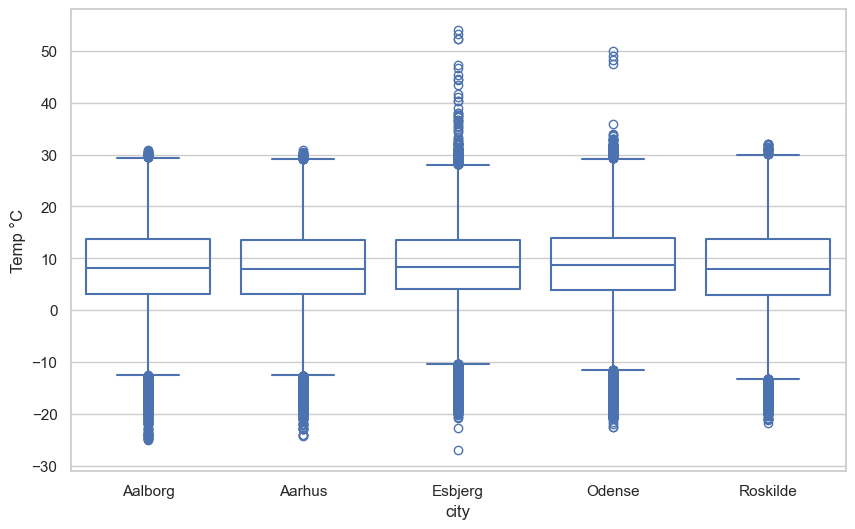

In [512]:

df_boxplot = df_weather_cleaned.stack(level=0).reset_index()
df_boxplot.rename(columns={'level_1':'city'},inplace=True)

fig, ax = plt.subplots(figsize=(10, 6))
sns.boxplot(x='city', y='Temp', data=df_boxplot, ax=ax,fill=False)
plt.ylabel('Temp °C')

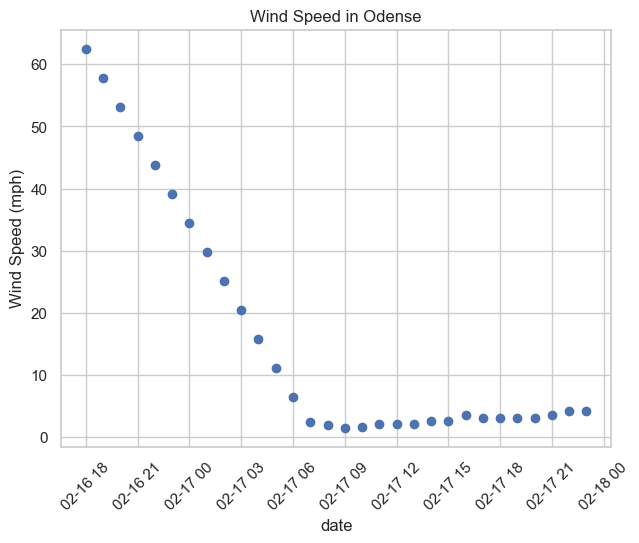

In [514]:
data = df_weather_cleaned['Odense']['WindSpeed']
filtered_df = data["2005-02-16 18:00:00":"2005-02-17 23:00:00"]

plt.scatter(filtered_df.index,filtered_df)
plt.tight_layout()
plt.xlabel('date')
plt.ylabel("Wind Speed (mph)")
plt.title('Wind Speed in Odense')
plt.xticks(rotation=45)
plt.show()


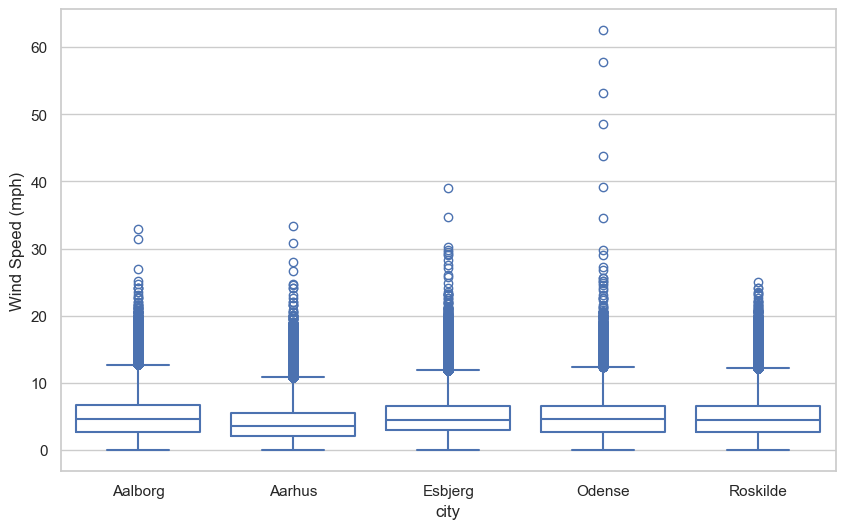

In [516]:
fig, ax = plt.subplots(figsize=(10, 6))
sns.boxplot(x='city', y='WindSpeed', data=df_boxplot, ax=ax,fill=False)
plt.ylabel('Wind Speed (mph)')
plt.show()

Text(0, 0.5, 'Pressure')

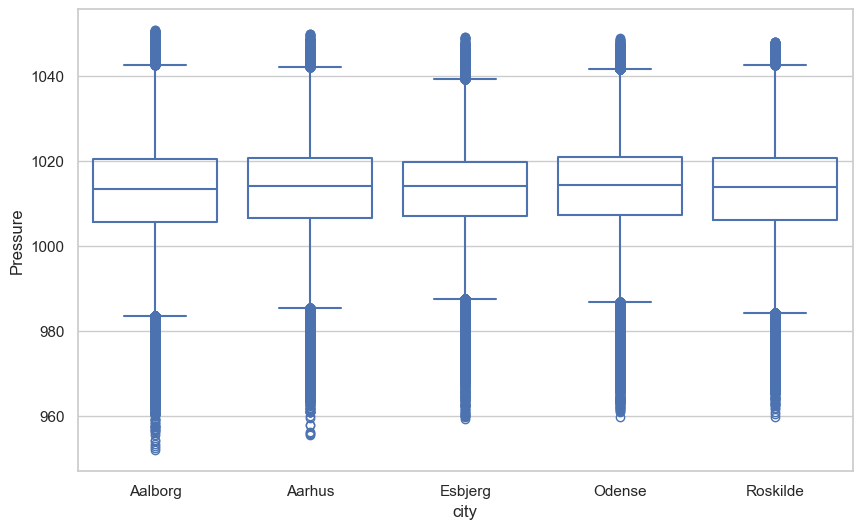

In [517]:
fig, ax = plt.subplots(figsize=(10, 6))
sns.boxplot(x='city', y='Pressure', data=df_boxplot, ax=ax,fill=False)
plt.ylabel('Pressure')

Text(0, 0.5, 'Wind Direction')

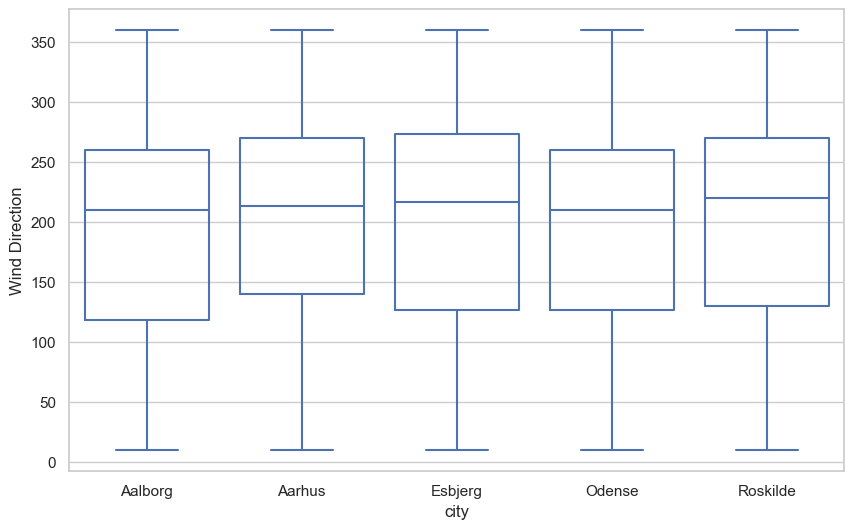

In [518]:
fig, ax = plt.subplots(figsize=(10, 6))
sns.boxplot(x='city', y='WindDir', data=df_boxplot, ax=ax,fill=False)
plt.ylabel('Wind Direction')

## TASK II - OUTLIERS

The second task is focused on spotting and overcoming outliers. Follow the instructions in the following:

**d. Store the temperature measurements in May 2006 for the city of Odense. Then produce a simple plot of the temperature versus time.**

*HINT: In this dataset, the cities are vertically stacked. Therefore, we have a multi column dataset, which basically works as a nested dictionary.*


**e. Find the outliers in this set of measurements (if any) and replace them using linear interpolation.**

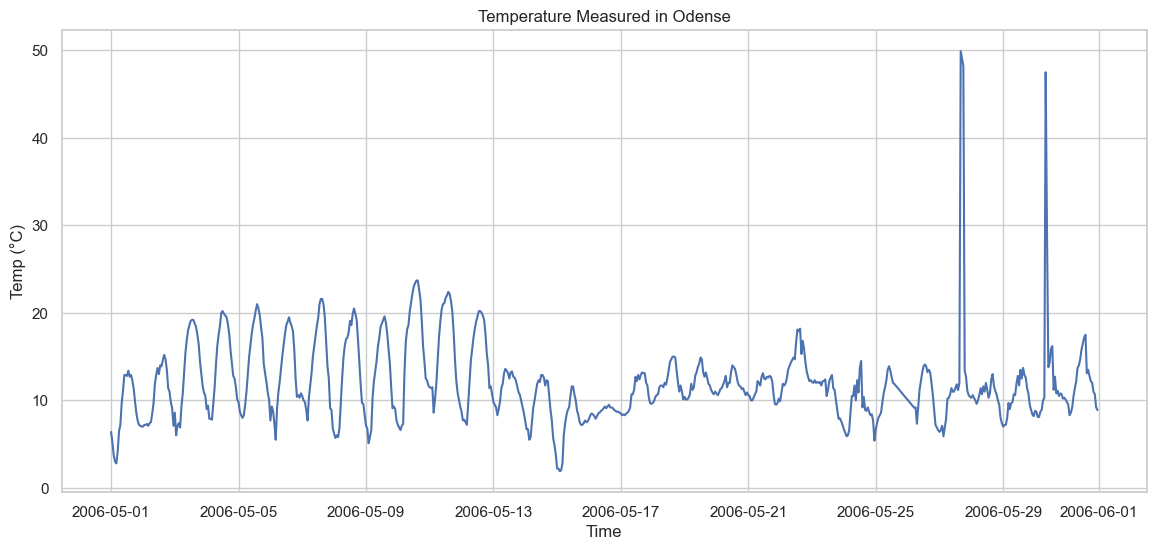

In [451]:
temp_measured = df_weather_cleaned[(df_weather_cleaned.index.month == 5) & (df_weather_cleaned.index.year == 2006)][('Odense','Temp')]
x = temp_measured.index
y = temp_measured

 
# plot time series
plt.figure(figsize=(14,6))
plt.plot(x,y)
#plt.xticks(ticks=x[::10000], labels=x[::10000], rotation=60)
plt.title("Temperature Measured in Odense")
plt.xlabel("Time")
plt.ylabel ("Temp (°C)")
plt.show()



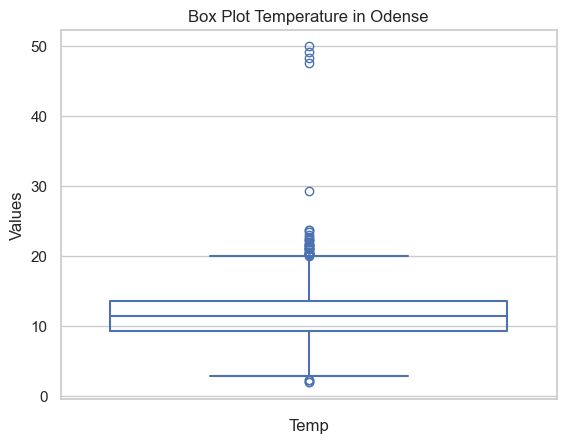

C:\Users\daria\AppData\Local\Temp\ipykernel_46552\3043385940.py:46: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  ax[0].scatter(x[outliers_idx], y[outliers_idx], color="red", marker="o", alpha=0.8)
C:\Users\daria\AppData\Local\Temp\ipykernel_46552\3043385940.py:55: FutureWarning: Series.__setitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To set a value by position, use `ser.iloc[pos] = value`
  new_temp[outliers_idx] = np.nan


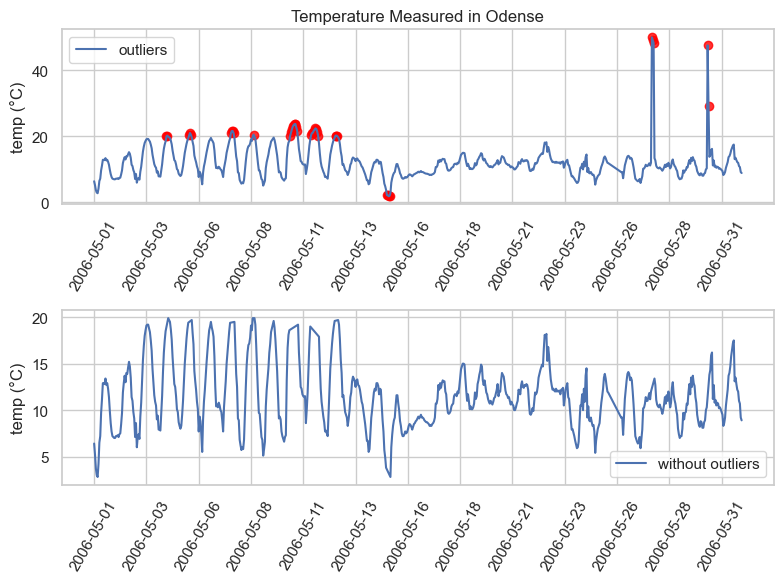

In [519]:
import seaborn as sns
from scipy import stats

sns.boxplot(temp_measured, fill=False)

# Adding a title and labels
plt.title("Box Plot Temperature in Odense")
plt.xlabel("Temp")
plt.ylabel("Values")
plt.show()

def iqr_detect(x, threshold: float=1.5):
    """
    Detects outliers using the interquantile range method and returns the indices of the outliers.

    Args:
        x (ArrayLike): data to be checked for outliers
        threshold (float): threshold for the interquantile range method

    Returns:
        (ArrayLike): indices of the outliers
    """

    # calculate the Q1 and Q3 quantiles
    x = np.array(x)
    Q1 = np.quantile(x, 0.25)
    Q3 = np.quantile(x, 0.75)

    #Whiskers min and max
    IQR = Q3-Q1
    IQR_min = Q1 - threshold*IQR
    IQR_max = Q3 + threshold*IQR

    #Extract outliers indexes
    indexes = np.where((x>IQR_max)|(x<IQR_min))

    return indexes[0]


outliers_idx = iqr_detect(temp_measured)

# Plot outliers
fig, ax = plt.subplots(2,1, figsize=(8,6))

ax[0].plot(x,y,label = "outliers")
ax[0].scatter(x[outliers_idx], y[outliers_idx], color="red", marker="o", alpha=0.8)
ax[0].set_title('Temperature Measured in Odense')
ax[0].set_ylabel('temp (°C)')
ax[0].set_xticks(ticks= x[::60],labels = x[::60].date,rotation=60)
ax[0].legend()


# replace outliers
new_temp  = temp_measured.copy()
new_temp[outliers_idx] = np.nan
new_temp.interpolate(method='linear', inplace=True)
#ax[1].set_title('Temperature Measured outliers replaced')
ax[1].plot(x,new_temp,label = "without outliers")
ax[1].set_xticks(ticks= x[::60],labels = x[::60].date,rotation=60)
ax[1].set_ylabel('temp (°C)')
ax[1].legend()
plt.tight_layout()
plt.show()






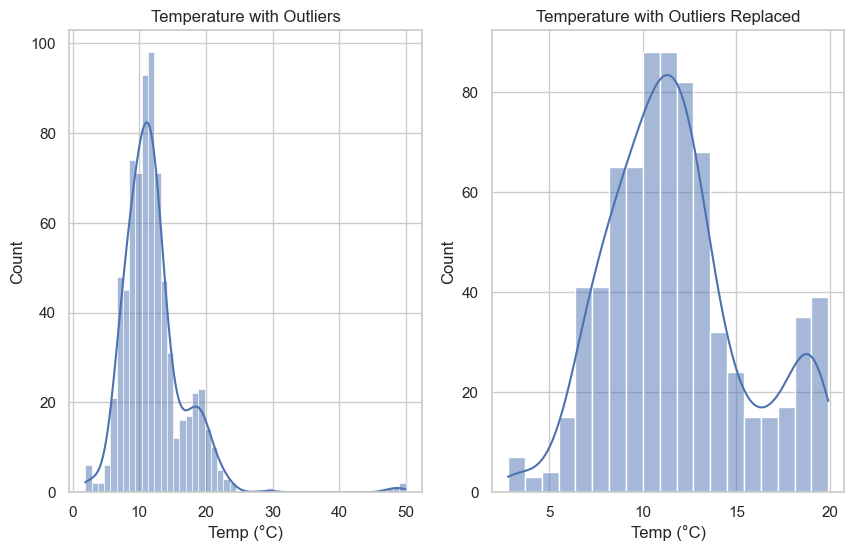

In [457]:
fig, ax = plt.subplots(1,2,figsize=(10, 6))

sns.histplot(temp_measured,kde=True,ax=ax[0])
plt.title('Histogram of Temperature')
ax[0].set_xlabel('Temp (°C)')
ax[0].set_title('Temperature with Outliers')

sns.histplot(new_temp, kde=True,ax=ax[1])
#plt.hist( new_temp,bins='auto', edgecolor='black')
ax[1].set_title('Temperature with Outliers Replaced')
ax[1].set_xlabel('Temp (°C)')
plt.show()

#new_temp


## TASK III.1 - CORRELATION

In this last task, you will be seeking correlation between features of the data and inferring hidden patterns.  For  this  task,  you  will  be  working  with  a  smaller  dataset.  Follow  the  instructions  in  the following:

**f. We  now  take  a new  dataset (`df_perth.pkl`),  which  collects  climate  data  of  a  city  in Australia. Here we have just one year of measurements, but more features.**

In [462]:
#################################
# Reading the data from the pickle file
file_path = './df_perth.pkl'
df_weather2 = pd.read_pickle(file_path)
df_weather2.tail()
#################################

,temp,pressure,relative humidity,wind speed,cloud cover,precipitation,PV production,"diffuse radiation, tilt",solar azimuth
DateTime,,,,,,,,,
2005-12-31 19:00:00,23.7,1013,47,6.9,1,0.0,1,1,61.1
2005-12-31 20:00:00,21.1,1013,61,6.0,1,0.0,0,0,52.2
2005-12-31 21:00:00,18.5,1013,75,4.2,1,0.0,0,0,41.4
2005-12-31 22:00:00,16.0,1013,83,3.5,1,0.0,0,0,28.5
2005-12-31 23:00:00,13.4,1013,100,3.5,1,0.0,0,0,13.3


**g. Find any significant correlations between features.**

*HINT: you might find useful looking fortrends and recurrent patterns within the data*

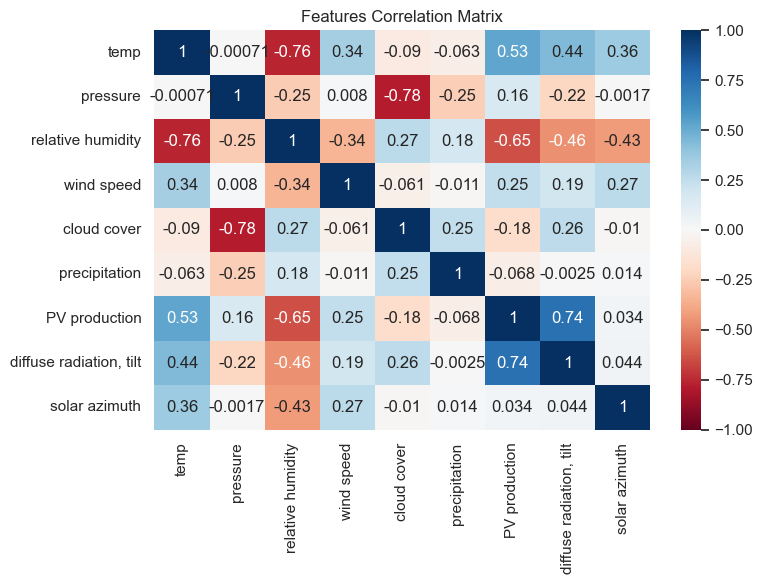

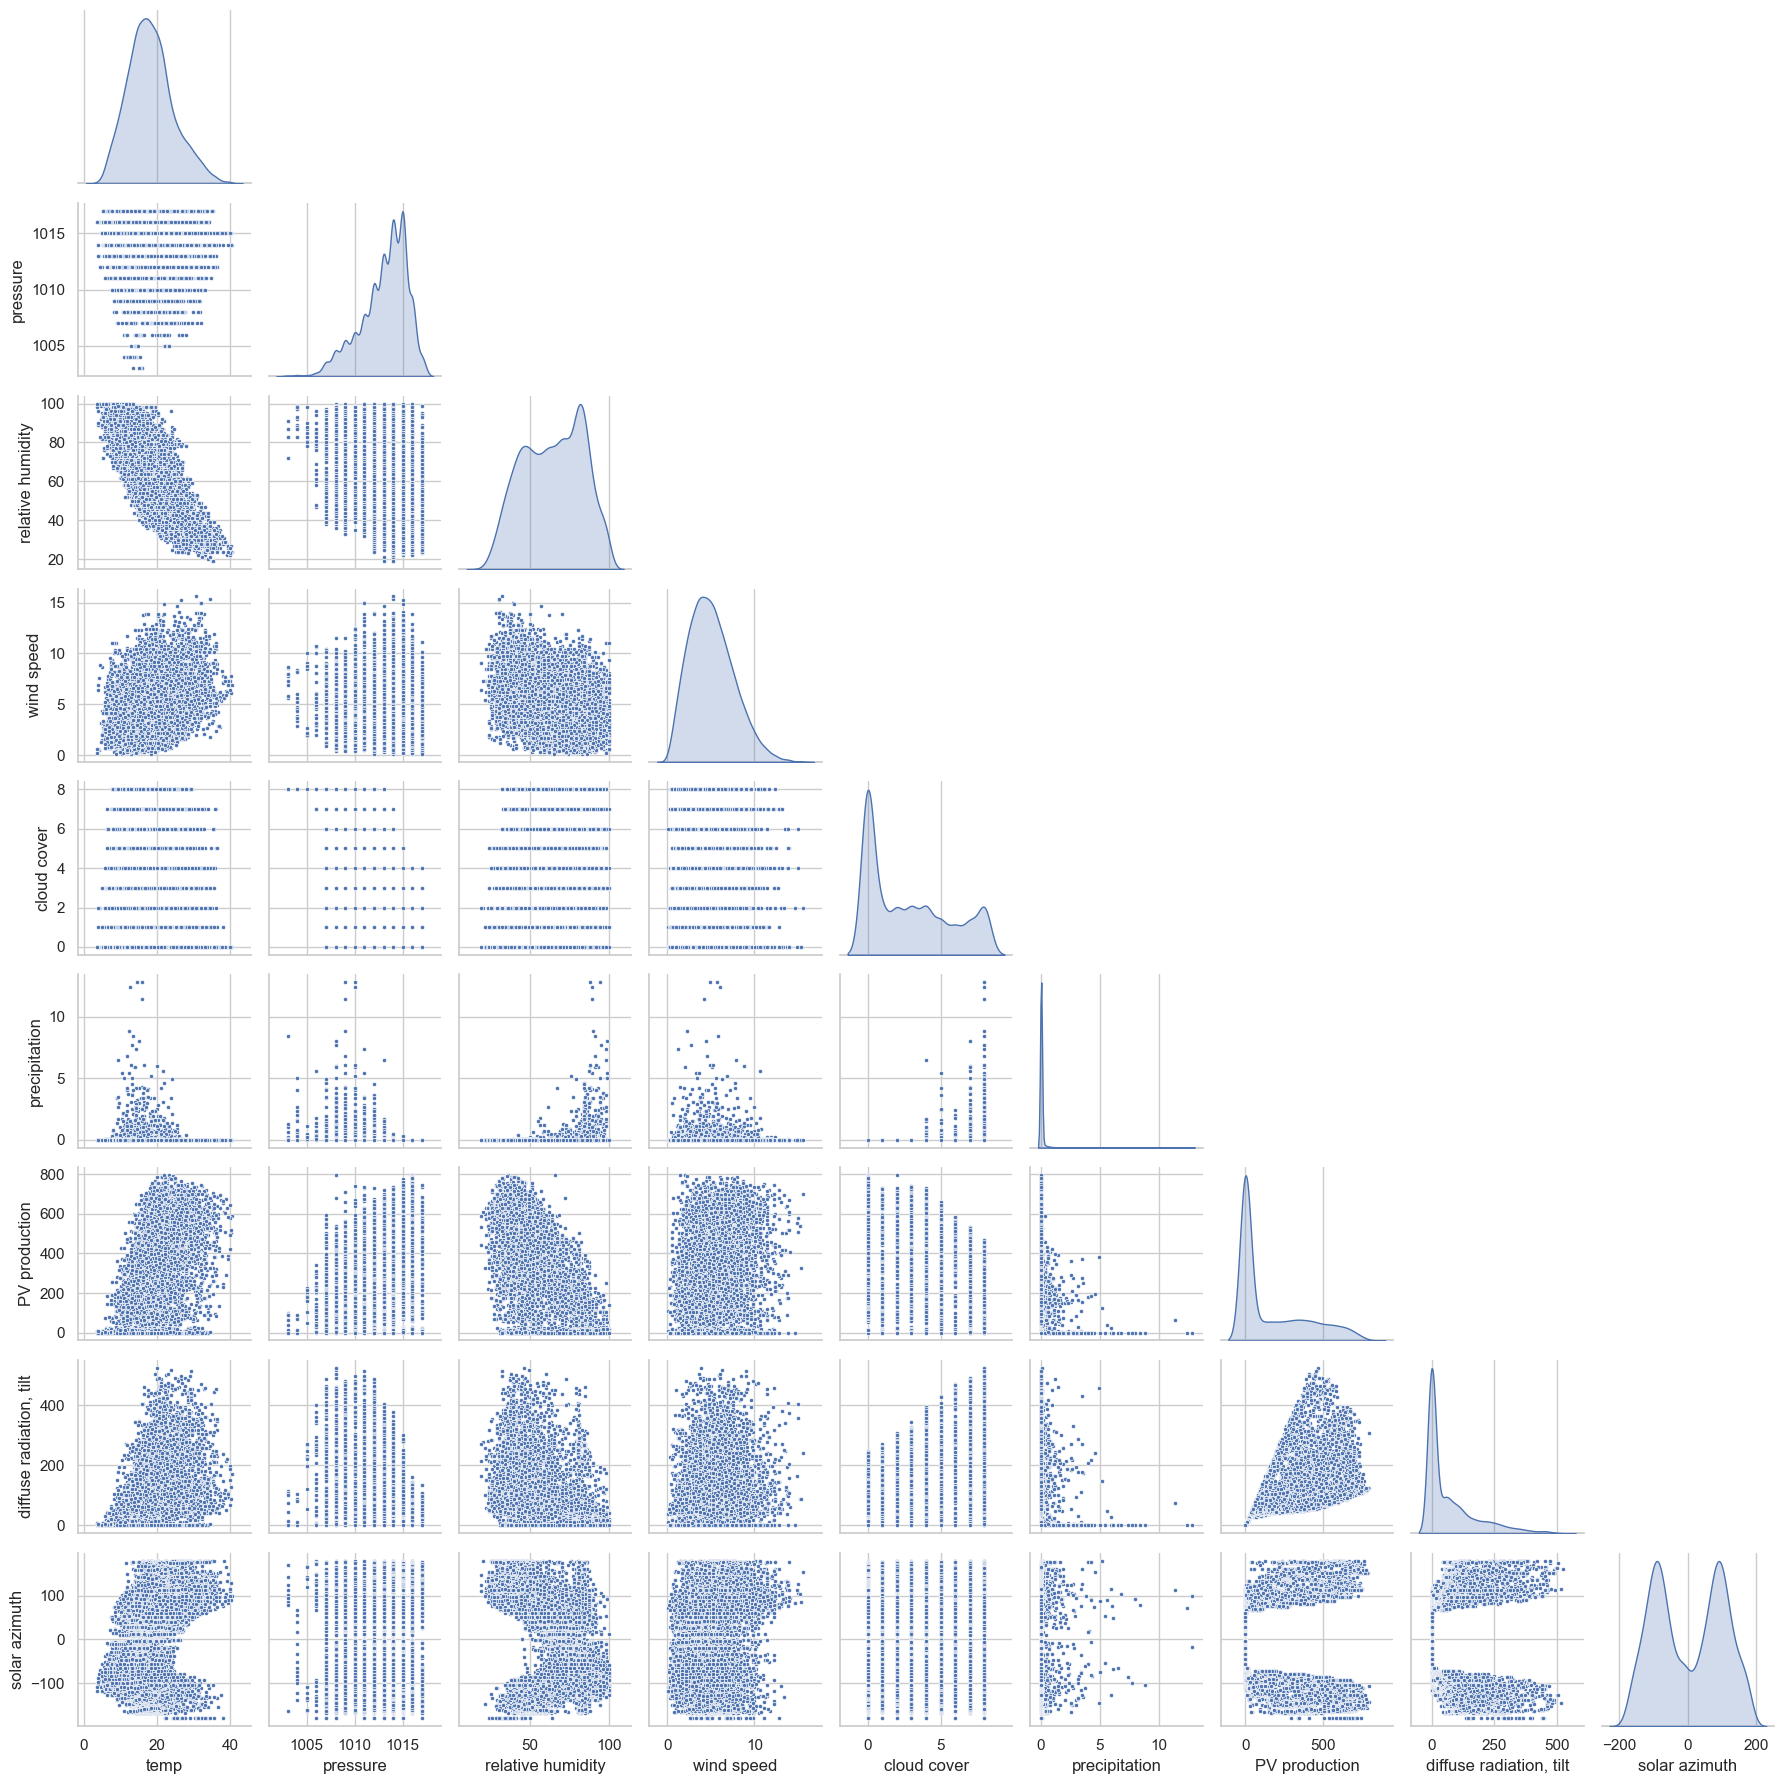

In [471]:
#################################
def correlation_matrix(data: pd.DataFrame):
    """
    Plots correlation matrix for a given dataset.

    Args:
        data (pd.DataFrame): The dataset used.
        name(str): filename
    """
    plt.figure(figsize=(8, 6))

    sns.heatmap(data.corr(), annot=True, cbar=True, cmap="RdBu", vmin=-1, vmax=1)
    plt.title("Features Correlation Matrix")
    plt.tight_layout()

    # Define the path where you want to save the plot
    plt.show()

correlation_matrix(df_weather2)


# Generate grid of scatterplots for pairwise relationships in the dataset
pairplot = sns.pairplot(data=df_weather2, height=2, markers=".", diag_kind="kde",corner=True)
plt.tight_layout()




#################################

**h. We now focus on the correlation between precipitation and cloud cover. We want to infer the probability of having moderate to heavy rain (> 1 mm/h) as a function of the cloud cover index.**

*HINT: you might find useful to create a new column where you have 0 if precipitation < 1 mm/h and 1 otherwise*

In [479]:

df_weather2['heavy_rain'] = np.where(df_weather2['precipitation'] > 1, 1, 0)
df_weather2[df_weather2['heavy_rain']==1]


# Grouping by CloudCoverIndex and calculating the conditional probability
conditional_probabilities = df_weather2.groupby('cloud cover')['heavy_rain'].mean()

# Displaying the conditional probabilities
#print("\nConditional Probabilities:")
#print(conditional_probabilities)
print((conditional_probabilities * 100).round(2).astype(str) + '%')




cloud cover
0     0.0%
1     0.0%
2     0.0%
3     0.0%
4    0.49%
5    1.21%
6    0.83%
7    4.86%
8    15.2%
Name: heavy_rain, dtype: object


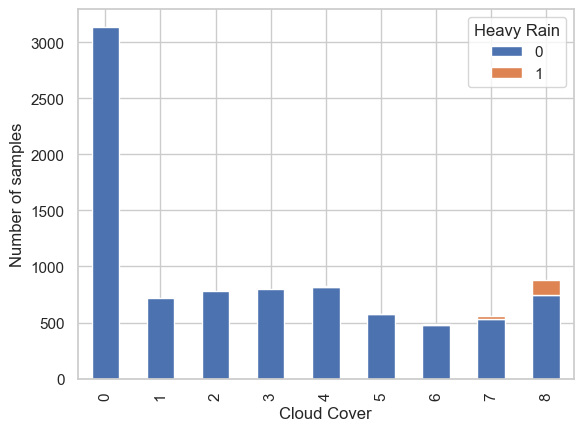

In [520]:
df_weather2.groupby(['cloud cover', 'heavy_rain'])['cloud cover'].count().unstack().plot(
    kind="bar", stacked=True)

# Add axes labels
plt.ylabel('Number of samples')
plt.xlabel('Cloud Cover')
plt.legend(title='Heavy Rain')


## TASK III.2 - INFERENCE

**i. Let’s now assume that we want to predict the photovoltaic production (PV production) using  multiple  linear  regression.  Explain  which  features  are  statistically  significant  in modelling the target variable.**

In [187]:
#################################
# Select predictors
predictors = ['diffuse radiation, tilt','relative humidity']
#################################

**j. Create a multivariate model using the predictors chosen in the previous question.**

In [199]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import PowerTransformer


X = df_weather2[predictors]
y = df_weather2['PV production']


# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Create polynomial features
degree = 3  
poly_features = PolynomialFeatures(degree)
X_train_poly = poly_features.fit_transform(X_train_scaled)
X_test_poly = poly_features.transform(X_test_scaled)


# Create a linear regression model
model = LinearRegression()

# Fit the model to the training data
model.fit(X_train_poly, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test_poly)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R-squared:", r2)

# Make predictions on the scaled training set
y_train_pred = model.predict(X_train_poly)

# Calculate and print the Mean Squared Error on the training set
mse_train = mean_squared_error(y_train, y_train_pred)
r2_train = r2_score(y_train, y_train_pred)
print("Mean Squared Error on Training Set:", mse_train)
print("R-squared:", r2_train)


Mean Squared Error: 8501.74272351428
R-squared: 0.8171163611582872
Mean Squared Error on Training Set: 9116.774499334248
R-squared: 0.8187734774438751


<Figure size 600x600 with 0 Axes>

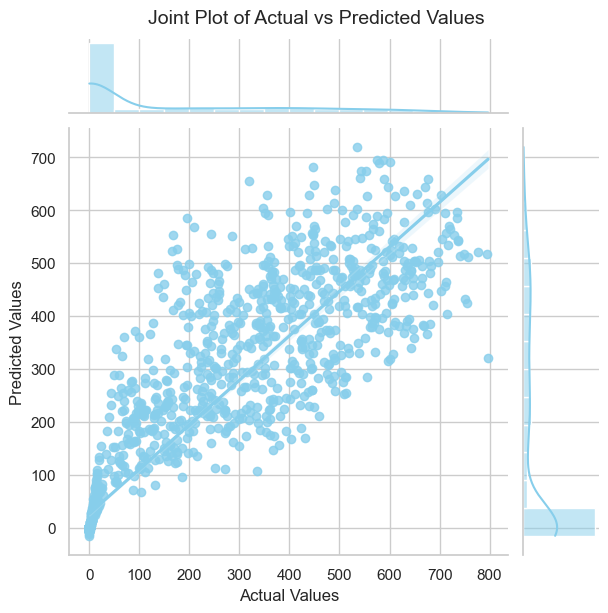

In [183]:
def plot_distribution(actual_values: np.array, predicted_values: np.array):
    """
    Create a joint plot to visualize the distribution of actual vs predicted values.

    Args:
        actual_values (np.array): Actual values.
        predicted_values (np.array): Predicted values.
        name (str): Name to include in the saved plot file.
    """

    plt.figure(figsize=(6, 6))

    # Create a joint plot
    sns.set(style="whitegrid")
    joint_plot = sns.jointplot(x=actual_values, y=predicted_values, kind="reg", color="skyblue")

    # Customize the plot
    joint_plot.set_axis_labels("Actual Values", "Predicted Values", fontsize=12)
    joint_plot.fig.suptitle(
        "Joint Plot of Actual vs Predicted Values", y=1.02, fontsize=14
    )


plot_distribution(y_test, y_pred)
